In [197]:
import numpy as np
import pandas as pd
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Example Analysis: qPCR


**Raw Data:** https://github.com/markur4/plotastic/tree/main/src/plotastic/example_data/data
  
**Original Source:** (unpublished)



In [199]:
# Import Example Data
DFr, _dims = plst.load_dataset("qpcr", verbose=False)
DFr

,Unnamed: 0,gene,method,fraction,subject,donor,ufc,class,fc
0,0,IFNG,MACS,F1,1,3033,0.003071,ECM & Adhesion,1.036131
1,1,IFNG,MACS,F1,3,1509,0.003005,ECM & Adhesion,1.013966
2,2,IFNG,MACS,F1,4,7361,0.002762,ECM & Adhesion,0.932101
3,3,IFNG,MACS,F1,5,2622,0.002922,ECM & Adhesion,0.986034
4,4,IFNG,MACS,F2,1,3033,0.008619,ECM & Adhesion,2.908520
...,...,...,...,...,...,...,...,...,...
593,840,TNFSF13,Wash,F3,8,8663,0.000313,Cytokines,0.923629
594,841,TNFSF13,Wash,F3,10,8009,0.000130,Cytokines,0.383351
595,842,TNFSF13,Wash,F3,11,6738,0.000152,Cytokines,0.447476
596,843,TNFSF13,Wash,F3,12,1632,0.000060,Cytokines,0.177527


In [200]:
# Preprocess Data
# fmt: off
DF = (
    DFr
    # .assign(**{"Fold Change": np.log(DFr["fc"])})
    .drop(columns=["ufc", "Unnamed: 0", "subject"])
    # .drop(columns=["ufc", "Unnamed: 0"])
    # [["class", "gene", "method", "fraction", "donor", "subject", "fc"]]
    [["class", "gene", "method", "fraction", "donor", "fc"]]

)
### Replace all values larger than 27 with 15
DF.loc[DF["fc"] > 27, "fc"] = 15

DF

,class,gene,method,fraction,donor,fc
0,ECM & Adhesion,IFNG,MACS,F1,3033,1.036131
1,ECM & Adhesion,IFNG,MACS,F1,1509,1.013966
2,ECM & Adhesion,IFNG,MACS,F1,7361,0.932101
3,ECM & Adhesion,IFNG,MACS,F1,2622,0.986034
4,ECM & Adhesion,IFNG,MACS,F2,3033,2.908520
...,...,...,...,...,...,...
593,Cytokines,TNFSF13,Wash,F3,8663,0.923629
594,Cytokines,TNFSF13,Wash,F3,8009,0.383351
595,Cytokines,TNFSF13,Wash,F3,6738,0.447476
596,Cytokines,TNFSF13,Wash,F3,1632,0.177527


In [201]:
DFlongmean = (
    DF.groupby(["class", "gene", "method", "fraction"])
    .mean()
    .drop(columns=["donor"])
)
DFlongmean

fc
class           gene  method fraction          
Bone Metabolism FBN1  MACS   F1        1.224738
                             F2        1.114198
                             F3        1.136044
                      Wash   F1        1.112433
                             F2        0.185106
...                                         ...
Signaling       WNT5A MACS   F2        1.888163
                             F3        1.154018
                      Wash   F1        1.202283
                             F2        0.690800
                             F3        0.720272

[114 rows x 1 columns]

In [202]:
DFlongmean.head(40)

fc
class           gene  method fraction           
Bone Metabolism FBN1  MACS   F1         1.224738
                             F2         1.114198
                             F3         1.136044
                      Wash   F1         1.112433
                             F2         0.185106
                             F3         0.361867
                SOST  MACS   F1         1.089947
                             F2        11.614792
                             F3         2.545575
                      Wash   F1         0.982152
                             F2         1.792519
                             F3         3.638128
                TIMP1 MACS   F1         0.881556
                             F2         0.515882
                             F3         0.897023
                      Wash   F1         1.417686
                             F2         0.807416
                             F3         1.263880
Chemokines      JAK2  MACS   F1         1.178744
                             F2         4.306033
                             F3         8.277586
                      Wash   F1         0.948179
                             F2         1.078643
                             F3         8.344019
                LOXL2 MACS   F1         0.894144
                             F2         1.203617
                             F3         4.654379
                      Wash   F1         1.497202
                             F2         0.661932
                             F3         1.537041
Cytokines       IL6R  MACS   F1         0.979659
                             F2         1.741660
                             F3         1.260874
                      Wash   F1         1.209353
                             F2         0.272772
                             F3         0.482336
                RUNX2 MACS   F1         0.949759
                             F2         0.837666
                             F3         0.900873
                      Wash   F1         1.266162

In [203]:
DFlongmean.reset_index().head(40)

,class,gene,method,fraction,fc
0,Bone Metabolism,FBN1,MACS,F1,1.224738
1,Bone Metabolism,FBN1,MACS,F2,1.114198
2,Bone Metabolism,FBN1,MACS,F3,1.136044
3,Bone Metabolism,FBN1,Wash,F1,1.112433
4,Bone Metabolism,FBN1,Wash,F2,0.185106
5,Bone Metabolism,FBN1,Wash,F3,0.361867
6,Bone Metabolism,SOST,MACS,F1,1.089947
7,Bone Metabolism,SOST,MACS,F2,11.614792
8,Bone Metabolism,SOST,MACS,F3,2.545575
9,Bone Metabolism,SOST,Wash,F1,0.982152


In [204]:
# fmt:off
# Unstack genes into columns to demonstrate human readable table (non long-format)
index = ["gene", "method", "class", "fraction", "donor"]
# index = ["gene", "fraction", "method", "class"]
unst = ["class", "gene"]
# unst = ["gene"]
DFunst = (
    DF.set_index(index)
    .unstack(level=unst)
    .droplevel(0, axis=1)
    .sort_index(axis=1, level=0)
)
print(DFunst.columns)
DFunst

MultiIndex([('Bone Metabolism',     'FBN1'),
            ('Bone Metabolism',     'SOST'),
            ('Bone Metabolism',    'TIMP1'),
            (     'Chemokines',     'JAK2'),
            (     'Chemokines',    'LOXL2'),
            (      'Cytokines',     'IL6R'),
            (      'Cytokines',    'RUNX2'),
            (      'Cytokines',    'STAT3'),
            (      'Cytokines',  'TNFSF13'),
            ( 'ECM & Adhesion',     'CCL5'),
            ( 'ECM & Adhesion',     'FZD4'),
            ( 'ECM & Adhesion',     'IFNG'),
            ( 'ECM & Adhesion',    'PTCH1'),
            (           'MMPs',     'MMP7'),
            (           'MMPs',     'MMP9'),
            (      'Signaling',   'NOTCH1'),
            (      'Signaling',      'TNC'),
            (      'Signaling', 'Vimentin'),
            (      'Signaling',    'WNT5A')],
           names=['class', 'gene'])


class                 Bone Metabolism                      Chemokines  \
gene                             FBN1       SOST     TIMP1       JAK2   
method fraction donor                                                   
MACS   F1       1509         0.208365   0.036203  0.563649   0.189299   
                2622         2.690587   0.810643  1.081018   0.906065   
                3033         1.111302   1.189357       NaN   1.093935   
                7361         0.888698   2.323585  1.000000   2.525678   
       F2       1509         0.505802   0.208506  0.372275  12.846506   
                2622         1.088728  12.557691  0.206496   1.164858   
                3033         2.636248  15.000000  1.077908   6.495476   
                7361         0.593659  18.978828  0.843504   0.497682   
                8663         0.746553  11.328937  0.079227   0.525641   
       F3       1509         0.692912   0.261934  0.532117  13.143653   
                2622         0.757357   2.656618  0.537810   1.866018   
                3033         0.425014   0.323605  0.842476   2.545432   
                7361         0.633503   1.279328  0.996481   1.344894   
                8663         3.171434   8.206390  1.576232  22.487932   
Wash   F1       1632         0.392689   0.147936  1.189164   1.333859   
                2234         3.246465   2.787868  0.978885   1.436190   
                6738         1.000000   1.567130  3.415613   1.000000   
                8009         0.362382   0.349302  0.993022   0.951795   
                8663         1.476341   1.000000  0.929434   0.702524   
                9570         0.196722   0.040678  1.000000   0.264710   
       F2       1632         0.120419   1.273419  1.142407   2.796768   
                2234         0.081536   1.053057  0.218301   0.215583   
                6738         0.090247   0.896839  1.564464   0.565363   
                8009         0.144508   0.311755  0.275983   1.218605   
                8663         0.352947   2.200718  0.112740   0.164874   
                9570         0.320981   5.019325  1.530604   1.510663   
       F3       1632         0.162318   3.296716  1.089114  17.419220   
                2234         0.272709   0.549666  1.003967   4.720014   
                6738         0.955446   3.994803  1.114988   1.859917   
                8009         0.272351   0.896259  1.951085  19.634478   
                8663         0.271939   7.590865  0.982392   3.450125   
                9570         0.236435   5.500459  1.441733   2.980362   

class                           Cytokines                                \
gene                      LOXL2      IL6R     RUNX2     STAT3   TNFSF13   
method fraction donor                                                     
MACS   F1       1509   0.383121  0.408991  0.892872  0.271202  0.352281   
                2622   0.937657  0.926625  1.107128  0.929732  1.137951   
                3033   1.193455  1.073375  1.442916  1.727526  0.862049   
                7361   1.062343  1.509644  0.356119  1.070268  1.348419   
       F2       1509   1.392463  0.745279  0.648990  0.680344  1.193936   
                2622   1.704650  1.357918  0.837948  0.836131  0.730385   
                3033   0.499609  4.589513  1.225577  3.269218  1.684316   
                7361   1.133503  1.181958  0.496481  0.750197  0.752533   
                8663   1.287863  0.833634  0.979333  0.580314  0.413239   
       F3       1509   2.109925  0.908032  1.430966  1.125094  2.293574   
                2622   3.525846  0.711326  1.179783  0.834470  1.894259   
                3033   4.403994  0.733149  0.493344  0.789510  0.774861   
                7361   6.939958  0.886675  0.613638  0.600662  1.173606   
                8663   6.292169  3.065187  0.786635  3.233108  3.594763   
Wash   F1       1632   1.485325  1.000000  1.085356  0.557257  0.222320   
                2234   0.235517  0.580911  0.749157  0.798013  1.000000   
                673

In [205]:
### Take mean of biol donors to make it even more readable
# fmt:off
DFmean = (
    DF
    .groupby(["class", "method", "gene", "fraction"])
    .mean()
    .drop(columns=["donor"])
    .unstack(level=unst)
    .droplevel(0, axis=1)
    .sort_index(axis=1, level=0)
    # .reset_index()
    
)
DFmean

class           Bone Metabolism                      Chemokines            \
gene                       FBN1       SOST     TIMP1       JAK2     LOXL2   
method fraction                                                             
MACS   F1              1.224738   1.089947  0.881556   1.178744  0.894144   
       F2              1.114198  11.614792  0.515882   4.306033  1.203617   
       F3              1.136044   2.545575  0.897023   8.277586  4.654379   
Wash   F1              1.112433   0.982152  1.417686   0.948179  1.497202   
       F2              0.185106   1.792519  0.807416   1.078643  0.661932   
       F3              0.361867   3.638128  1.263880   8.344019  1.537041   

class           Cytokines                               ECM & Adhesion  \
gene                 IL6R     RUNX2     STAT3   TNFSF13           CCL5   
method fraction                                                          
MACS   F1        0.979659  0.949759  0.999682  0.925175       0.948568   
       F2        1.741660  0.837666  1.223241  0.954882       2.919969   
       F3        1.260874  0.900873  1.316569  1.946213      13.812657   
Wash   F1        1.209353  1.266162  1.066845  1.012266       1.295970   
       F2        0.272772  0.762314  0.344173  0.359300       3.384903   
       F3        0.482336  0.971110  0.552289  0.489625      12.534468   

class                                                 MMPs             \
gene                  FZD4      IFNG      PTCH1       MMP7       MMP9   
method fraction                                                         
MACS   F1         1.131745  0.992058   1.128836   1.427176   1.000000   
       F2         3.423048  1.390371   2.813818   3.689864   7.309265   
       F3        13.471379  1.312615  14.306614  16.821208  15.000000   
Wash   F1         1.282734  1.145044   1.015861   1.124032   4.318671   
       F2         6.084710  0.547743   2.577317   0.898533   4.861697   
       F3         8.638322  1.074253   8.956537   2.220266  14.150907   

class           Signaling                                
gene               NOTCH1       TNC  Vimentin     WNT5A  
method fraction                                          
MACS   F1        0.881029  0.917549  0.947688  0.901300  
       F2        1.400414  1.278659  3.642877  1.888163  
       F3        1.867551  1.814971  2.028801  1.154018  
Wash   F1        1.152116  1.491648  1.350508  1.202283  
       F2        0.374498  0.336921  0.692729  0.690800  
       F3        0.810544  0.363349  1.563609  0.720272

# seaborn

In [206]:
# Take only part of DF for example
DATA = DF[DF["gene"].isin(["FBN1", "SOST", "TIMP1", "JAK2", "LOXL2", "IL6R"])]

In [207]:
# Make plot configuration and store it as 'settings'
settings = dict(
    aspect=1.4,  # Width/Height
    height=2,  # Height
    alpha=0.45,  # Makes markers transparent
    s=3,  # Marker size
    dodge=True,  # Separate points when using hue
    sharey=False,  # If multiple plots, don't share y-axis scale
)

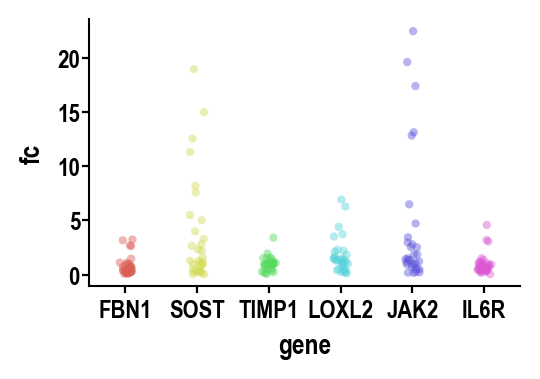

In [208]:
import seaborn as sns

sns.catplot(
    data=DATA,  # Our Table containing all datapoints
    y="fc",  # Column for y-axis: Fold Change
    x="gene",  # Column for x-axis: Gene
    **settings,  # Unpack settings
)
plt.show()

In [209]:
D1 = DATA[(DATA["gene"] == "FBN1") & (DATA["fraction"] == "F2")]
D1.drop(columns=["class"])

,gene,method,fraction,donor,fc
162,FBN1,MACS,F2,3033,2.636248
163,FBN1,MACS,F2,8663,0.746553
164,FBN1,MACS,F2,1509,0.505802
165,FBN1,MACS,F2,7361,0.593659
166,FBN1,MACS,F2,2622,1.088728
178,FBN1,Wash,F2,2234,0.081536
179,FBN1,Wash,F2,8663,0.352947
180,FBN1,Wash,F2,8009,0.144508
181,FBN1,Wash,F2,6738,0.090247
182,FBN1,Wash,F2,1632,0.120419


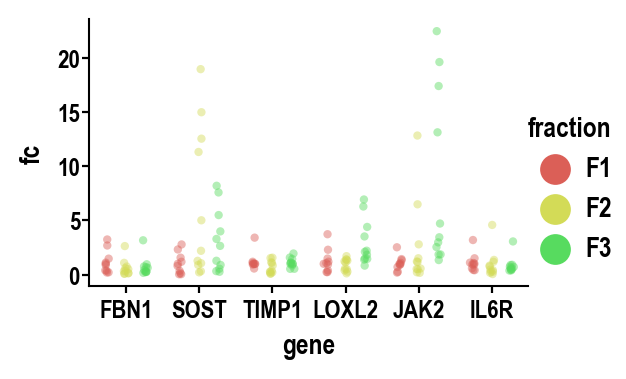

In [210]:
sns.catplot(
    data=DATA,
    y="fc",
    x="gene",
    hue="fraction",
    **settings,
)
plt.show()

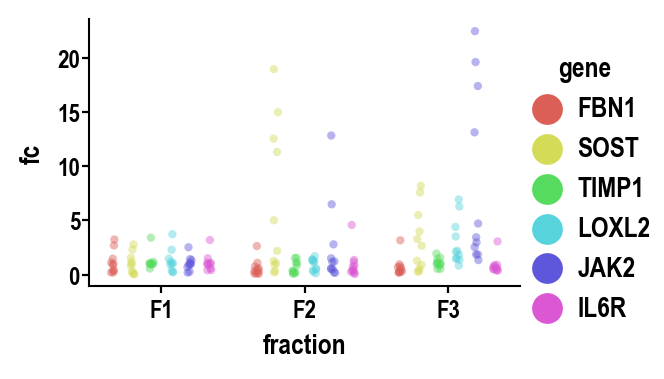

In [211]:
sns.catplot(
    data=DATA,
    y="fc",
    x="fraction",
    hue="gene",
    **settings,
)
plt.show()

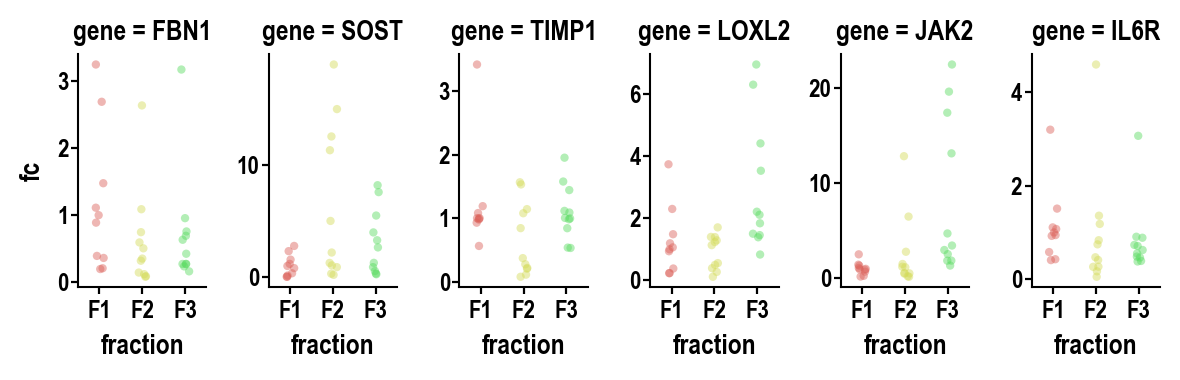

In [212]:
settings.update(dict(aspect=0.5))

sns.catplot(
    data=DATA,
    y="fc",
    x="fraction",
    col="gene",
    **settings,
)
plt.show()

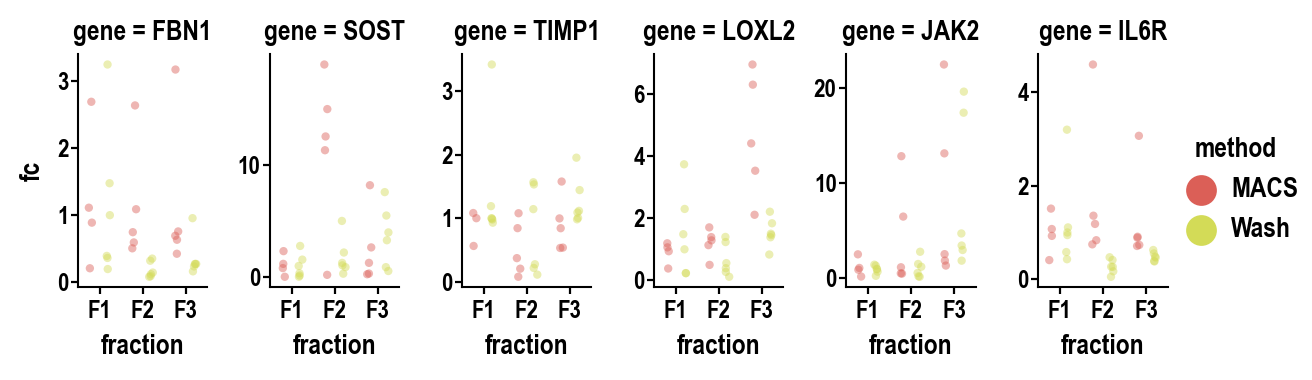

In [213]:
sns.catplot(
    data=DATA,
    y="fc",
    x="fraction",
    col="gene",
    hue="method",
    **settings,
)
plt.show()

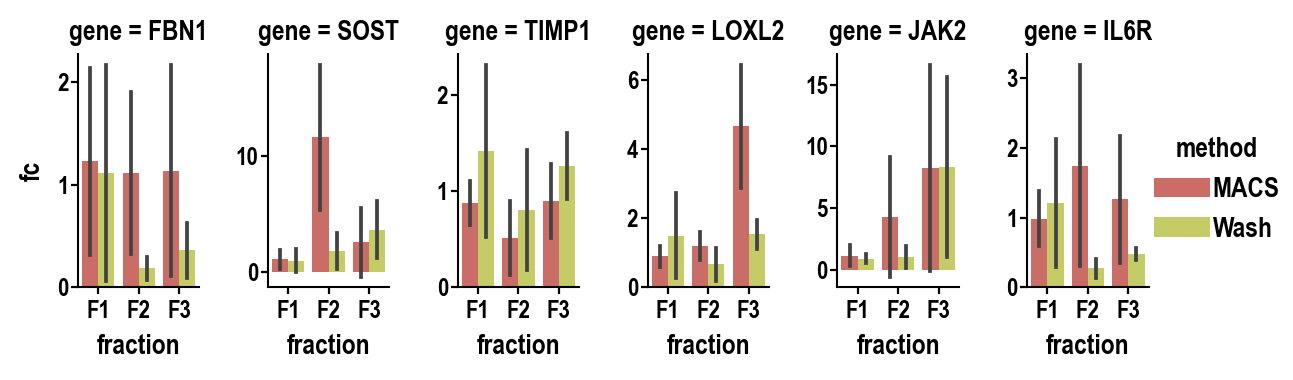

In [214]:
settings_bar = dict(
    kind="bar",  # Change to barplot
    aspect=0.5,  # Width/Height
    height=2,  # Height
    sharey=False,  # Don't share y-axis scale
    ci="sd",  # Error bars show STD (default is 95% CI)
)

sns.catplot(
    data=DATA,
    y="fc",
    x="fraction",
    col="gene",
    hue="method",
    **settings_bar,
)
plt.show()

# pingouin

In [215]:
import pingouin as pg

In [216]:
# DIsplay data
# DATA = DF  # Rename it to include all data
DATA["fc_log"] = np.log(DATA["fc"])
DATA

,class,gene,method,fraction,donor,fc,fc_log
158,Bone Metabolism,FBN1,MACS,F1,3033,1.111302,0.105532
159,Bone Metabolism,FBN1,MACS,F1,1509,0.208365,-1.568465
160,Bone Metabolism,FBN1,MACS,F1,7361,0.888698,-0.117997
161,Bone Metabolism,FBN1,MACS,F1,2622,2.690587,0.989760
162,Bone Metabolism,FBN1,MACS,F2,3033,2.636248,0.969357
...,...,...,...,...,...,...,...
561,Cytokines,IL6R,Wash,F3,8663,0.551365,-0.595358
562,Cytokines,IL6R,Wash,F3,8009,0.379152,-0.969819
563,Cytokines,IL6R,Wash,F3,6738,0.463799,-0.768303
564,Cytokines,IL6R,Wash,F3,1632,0.390947,-0.939184


In [217]:
# test sphericity
pg.sphericity(DATA, subject="donor", dv="fc", within="fraction")

SpherResults(spher=True, W=0.7694513607132983, chi2=2.0966202932044222, dof=2, pval=0.3505295925289715)

In [218]:
pg.sphericity(DATA, subject="donor", dv="fc_log", within="fraction")

SpherResults(spher=True, W=0.8146973555686703, chi2=1.6395086205330818, dof=2, pval=0.4405398773358764)

In [219]:
pg.sphericity(DATA, subject="donor", dv="fc_log", within="gene")

SpherResults(spher=False, W=0.02501719717983454, chi2=26.18616180418619, dof=14, pval=0.03141907951972245)

In [220]:
rmanova_result = pg.rm_anova(
    data=DATA,  # Our Table containing all datapoints
    dv="fc",  # Dependent Variable
    within=["gene", "fraction"],  # Within-Subject Factors
    subject="donor",  # Subject Identifier
    detailed=True,  # Show detailed output
)
rmanova_result

/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,gene,240.426238,5,40,48.085248,5.150324,0.000970,0.036734,0.187557,0.269850
1,fraction,72.782862,2,16,36.391431,4.180213,0.034632,0.040489,0.065321,0.898369
2,gene * fraction,309.350222,10,80,30.935022,4.952256,0.000015,0.041949,0.229012,0.130359


In [221]:
rmanova_result = pg.rm_anova(
    data=DATA,  # Our Table containing all datapoints
    dv="fc",  # Dependent Variable
    within="fraction",  # Within-Subject Factors
    subject="donor",  # Subject Identifier
    detailed=True,  # Show detailed output
)
rmanova_result

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,fraction,11.348719,2,5.674360,3.070683,0.071219,0.223367,0.812646
1,Error,33.262459,18,1.847914,NaN,NaN,NaN,NaN


In [222]:
import pingouin as pg

rmanova_results = {}
for gene, data in DATA.groupby("gene"):
    result = pg.rm_anova(
        data=data,  # Table grouped by gene
        dv="fc",  # Dependent Variable
        within="fraction",  # Within-Subject Factors
        subject="donor",  # Subject Identifier
        detailed=True,  # Show detailed output
    )
    rmanova_results[gene] = result
rmanova_result = pd.concat(rmanova_results)

rmanova_result

Source          SS  DF          MS         F     p-unc       ng2  \
FBN1  0  fraction    1.974899   2    0.987450  1.683234  0.213726  0.102030   
      1     Error   10.559491  18    0.586638       NaN       NaN       NaN   
IL6R  0  fraction    0.729079   2    0.364539  0.408456  0.670683  0.029953   
      1     Error   16.064650  18    0.892481       NaN       NaN       NaN   
JAK2  0  fraction  250.523638   2  125.261819  5.880371  0.010831  0.291584   
      1     Error  383.430373  18   21.301687       NaN       NaN       NaN   
LOXL2 0  fraction   21.477898   2   10.738949  6.411602  0.007899  0.329911   
      1     Error   30.148641  18    1.674925       NaN       NaN       NaN   
SOST  0  fraction  140.239055   2   70.119528  3.807373  0.041787  0.219371   
      1     Error  331.501963  18   18.416776       NaN       NaN       NaN   
TIMP1 0  fraction    1.449347   2    0.724674  2.483595  0.114984  0.128017   
      1     Error    4.668545  16    0.291784       NaN       NaN       NaN   

              eps  p-GG-corr sphericity   W-spher   p-spher  
FBN1  0  0.880855        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
IL6R  0  0.783617        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
JAK2  0  0.762269        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
LOXL2 0  0.690649        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
SOST  0  0.613063   0.070981      False  0.368847  0.018509  
      1       NaN        NaN        NaN       NaN       NaN  
TIMP1 0  0.844225        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN

In [223]:
import pingouin as pg

results = {}
for gene, data in DATA.groupby("gene"):
    result = pg.anova(
        data=data,  # Table grouped by gene
        dv="fc",  # Dependent Variable
        between=["fraction", "method"],  # Between-Subject Factors
        detailed=True,  # Show detailed output
    )
    results[gene] = result
rmanova_result = pd.concat(rmanova_results)

rmanova_result

Source          SS  DF          MS         F     p-unc       ng2  \
FBN1  0  fraction    1.974899   2    0.987450  1.683234  0.213726  0.102030   
      1     Error   10.559491  18    0.586638       NaN       NaN       NaN   
IL6R  0  fraction    0.729079   2    0.364539  0.408456  0.670683  0.029953   
      1     Error   16.064650  18    0.892481       NaN       NaN       NaN   
JAK2  0  fraction  250.523638   2  125.261819  5.880371  0.010831  0.291584   
      1     Error  383.430373  18   21.301687       NaN       NaN       NaN   
LOXL2 0  fraction   21.477898   2   10.738949  6.411602  0.007899  0.329911   
      1     Error   30.148641  18    1.674925       NaN       NaN       NaN   
SOST  0  fraction  140.239055   2   70.119528  3.807373  0.041787  0.219371   
      1     Error  331.501963  18   18.416776       NaN       NaN       NaN   
TIMP1 0  fraction    1.449347   2    0.724674  2.483595  0.114984  0.128017   
      1     Error    4.668545  16    0.291784       NaN       NaN       NaN   

              eps  p-GG-corr sphericity   W-spher   p-spher  
FBN1  0  0.880855        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
IL6R  0  0.783617        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
JAK2  0  0.762269        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
LOXL2 0  0.690649        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN  
SOST  0  0.613063   0.070981      False  0.368847  0.018509  
      1       NaN        NaN        NaN       NaN       NaN  
TIMP1 0  0.844225        NaN        NaN       NaN       NaN  
      1       NaN        NaN        NaN       NaN       NaN

In [224]:
## pairwise tests post-hoc

results = {}
for gene, data in DATA.groupby("gene"):
    result = pg.pairwise_tests(
        data=data,  # Table grouped by gene
        dv="fc",  # Dependent Variable
        between=["fraction", "method"],  # Between-Subject Factors
        padjust="none",  # Multiple Comparison correction
    )
    results[gene] = result
posthoc_result = pd.concat(results)

posthoc_result

Contrast fraction     A     B Paired  Parametric         T  \
FBN1  0           fraction        -    F1    F2  False        True  1.371392   
      1           fraction        -    F1    F3  False        True  1.054218   
      2           fraction        -    F2    F3  False        True -0.311420   
      3             method        -  MACS  Wash  False        True  1.928809   
      4  fraction * method       F1  MACS  Wash  False        True  0.159424   
      5  fraction * method       F2  MACS  Wash  False        True  2.344188   
      6  fraction * method       F3  MACS  Wash  False        True  1.472468   
IL6R  0           fraction        -    F1    F2  False        True  0.382945   
      1           fraction        -    F1    F3  False        True  0.820827   
      2           fraction        -    F2    F3  False        True  0.232081   
      3             method        -  MACS  Wash  False        True  2.038480   
      4  fraction * method       F1  MACS  Wash  False        True -0.488831   
      5  fraction * method       F2  MACS  Wash  False        True  2.030526   
      6  fraction * method       F3  MACS  Wash  False        True  1.713214   
JAK2  0           fraction        -    F1    F2  False        True -1.269705   
      1           fraction        -    F1    F3  False        True -2.946737   
      2           fraction        -    F2    F3  False        True -2.118883   
      3             method        -  MACS  Wash  False        True  0.617385   
      4  fraction * method       F1  MACS  Wash  False        True  0.443612   
      5  fraction * method       F2  MACS  Wash  False        True  1.319064   
      6  fraction * method       F3  MACS  Wash  False        True -0.012561   
LOXL2 0           fraction        -    F1    F2  False        True  0.923108   
      1           fraction        -    F1    F3  False        True -2.381726   
      2           fraction        -    F2    F3  False        True -3.154058   
      3             method        -  MACS  Wash  False        True  1.837245   
      4  fraction * method       F1  MACS  Wash  False        True -1.043109   
      5  fraction * method       F2  MACS  Wash  False        True  1.843374   
      6  fraction * method       F3  MACS  Wash  False        True  3.439523   
SOST  0           fraction        -    F1    F2  False        True -2.493040   
      1           fraction        -    F1    F3  False        True -2.293589   
      2           fraction        -    F2    F3  False        True  1.383679   
      3             method        -  MACS  Wash  False        True  1.782226   
      4  fraction * method       F1  MACS  Wash  False        True  0.167760   
      5  fraction * method       F2  MACS  Wash  False        True  3.057865   
      6  fraction * method       F3  MACS  Wash  False        True -0.592196   
TIMP1 0           fraction        -    F1    F2  False        True  1.723991   
      1           fraction        -    F1    F3  False        True  0.463551   
      2           fraction        -    F2    F3  False        True -1.962979   
      3             method        -  MACS  Wash  False        True -2.011663   
      4  fraction * method       F1  MACS  Wash  False        True -1.240451   
      5  fraction * method       F2  MACS  Wash  False        True -0.863991   
      6  fraction * method       F3  MACS  Wash  False        True -1.494386   

               dof alternative     p-unc   BF10    hedges  
FBN1  0  16.045611   two-sided  0.189128  0.752  0.584964  
      1  17.405593   two-sided  0.306198  0.579  0.446753  
      2  20.000000   two-sided  0.758705  0.398 -0.127747  
      3  24.743810   two-sided  0.065302  1.344  0.688159  
      4   7.024277   two-sided  0.877822  0.502  0.091066  
      5   4.124627   two-sided  0.077044  1.996  1.432266  
      6   4.440924   two-sided  0.207980  0.903  0.891562  
IL6R  0  17.007228   two-sided  0.706504  0.412  0.157175  
      1  18.554302   two-sided  0.422

# plotastic

In [225]:
import plotastic as plst

DA = plst.DataAnalysis(
    data=DATA,
    dims=dict(
        y="fc",
        x="fraction",
        col="gene",
        hue="method",
    ),
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
🫠 GROUPS UNEQUAL: Groups (36 total) have different samplesizes (n = 5.3 ±0.8).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                         |   fc |
   |:------------------------|-----:|
   | ('TIMP1', 'F3', 'Wash') |    6 |
   | ('TIMP1', 'F2', 'Wash') |    6 |
   | ('SOST', 'F2', 'Wash')  |    6 |
   | ('SOST', 'F1', 'Wash')  |    6 |
   | ('LOXL2', 'F3', 'Wash') |    6 |
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['fraction', 'method'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.


In [226]:
# DA.levels_dendrogram()
# plt.show()

In [227]:
DATA

,class,gene,method,fraction,donor,fc,fc_log
158,Bone Metabolism,FBN1,MACS,F1,3033,1.111302,0.105532
159,Bone Metabolism,FBN1,MACS,F1,1509,0.208365,-1.568465
160,Bone Metabolism,FBN1,MACS,F1,7361,0.888698,-0.117997
161,Bone Metabolism,FBN1,MACS,F1,2622,2.690587,0.989760
162,Bone Metabolism,FBN1,MACS,F2,3033,2.636248,0.969357
...,...,...,...,...,...,...,...
561,Cytokines,IL6R,Wash,F3,8663,0.551365,-0.595358
562,Cytokines,IL6R,Wash,F3,8009,0.379152,-0.969819
563,Cytokines,IL6R,Wash,F3,6738,0.463799,-0.768303
564,Cytokines,IL6R,Wash,F3,1632,0.390947,-0.939184


In [228]:
DA.check_normality()  # -> Only few groups are not normal -> parametric

/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group F1 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")


W      pval  normal  n
gene  fraction method                               
FBN1  MACS     F1      0.918496  0.528551    True  4
               F2      0.762121  0.038392   False  5
               F3      0.656790  0.003198   False  5
      Wash     F1      0.818313  0.085331    True  6
               F2      0.807262  0.068246    True  6
               F3      0.626443  0.000945   False  6
IL6R  MACS     F1      0.986385  0.938301    True  4
               F2      0.692218  0.007926   False  5
               F3      0.629527  0.001505   False  5
      Wash     F1      0.735833  0.014425   False  6
               F2      0.965036  0.857582    True  6
               F3      0.944201  0.693197    True  6
JAK2  MACS     F1      0.932119  0.606909    True  4
               F2      0.799788  0.080712    True  5
               F3      0.809407  0.096465    True  5
      Wash     F1      0.952672  0.761855    True  6
               F2      0.893050  0.334476    True  6
               F3      0.765322  0.028020   False  6
LOXL2 MACS     F1      0.876003  0.321846    True  4
               F2      0.938511  0.655429    True  5
               F3      0.956825  0.785719    True  5
      Wash     F1      0.908863  0.428957    True  6
               F2      0.876562  0.253638    True  6
               F3      0.965192  0.858716    True  6
SOST  MACS     F1      0.982791  0.918191    True  4
               F2      0.907340  0.451772    True  5
               F3      0.779319  0.054383    True  5
      Wash     F1      0.884020  0.288032    True  6
               F2      0.809152  0.070928    True  6
               F3      0.950476  0.744133    True  6
TIMP1 MACS     F1           NaN       NaN   False  3
               F2      0.915237  0.499692    True  5
               F3      0.879279  0.306055    True  5
      Wash     F1      0.569309  0.000192   False  6
               F2      0.818655  0.085916    True  6
               F3      0.795470  0.053488    True  6

In [229]:
DA.check_homoscedasticity()

W      pval  equal_var  group count n per group
gene  fraction method                                                        
FBN1  MACS     levene  0.032954  0.967678       True            3   [4, 5, 5]
      Wash     levene  3.281803  0.065732       True            3   [6, 6, 6]
IL6R  MACS     levene  0.345282  0.715426       True            3   [4, 5, 5]
      Wash     levene  1.833120  0.193981       True            3   [6, 6, 6]
JAK2  MACS     levene  1.044380  0.384342       True            3   [4, 5, 5]
      Wash     levene  3.176970  0.070729       True            3   [6, 6, 6]
LOXL2 MACS     levene  5.450659  0.022650      False            3   [4, 5, 5]
      Wash     levene  2.857132  0.088851       True            3   [6, 6, 6]
SOST  MACS     levene  1.422812  0.282125       True            3   [4, 5, 5]
      Wash     levene  1.696459  0.216673       True            3   [6, 6, 6]
TIMP1 MACS     levene  0.339447  0.720060       True            3   [3, 5, 5]
      Wash     levene  0.566302  0.579296       True            3   [6, 6, 6]

In [230]:
DA.omnibus_anova()

Source          SS    DF          MS          F     p-unc  \
gene                                                                            
FBN1  0           fraction    1.994866   2.0    0.997433   1.382061  0.268899   
      1             method    3.075336   1.0    3.075336   4.261239  0.049102   
      2  fraction * method    0.943739   2.0    0.471869   0.653830  0.528391   
      3           Residual   18.764195  26.0    0.721700        NaN       NaN   
SOST  0           fraction  137.724742   2.0   68.862371   5.974759  0.007328   
      1             method   73.743564   1.0   73.743564   6.398270  0.017825   
      2  fraction * method  192.659051   2.0   96.329525   8.357913  0.001574   
      3           Residual  299.664252  26.0   11.525548        NaN       NaN   
TIMP1 0           fraction    1.572414   2.0    0.786207   2.074440  0.146716   
      1             method    1.103313   1.0    1.103313   2.911138  0.100365   
      2  fraction * method    0.070403   2.0    0.035201   0.092880  0.911615   
      3           Residual    9.474932  25.0    0.378997        NaN       NaN   
LOXL2 0           fraction   25.621246   2.0   12.810623  11.714102  0.000236   
      1             method    9.267483   1.0    9.267483   8.474236  0.007296   
      2  fraction * method   18.908668   2.0    9.454334   8.645093  0.001323   
      3           Residual   28.433780  26.0    1.093607        NaN       NaN   
JAK2  0           fraction  311.299365   2.0  155.649682   5.119026  0.013351   
      1             method   10.715445   1.0   10.715445   0.352411  0.557881   
      2  fraction * method   17.831572   2.0    8.915786   0.293223  0.748289   
      3           Residual  790.558863  26.0   30.406110        NaN       NaN   
IL6R  0           fraction    0.551817   2.0    0.275908   0.352568  0.706189   
      1             method    3.961393   1.0    3.961393   5.062044  0.033143   
      2  fraction * method    3.702736   2.0    1.851368   2.365760  0.113779   
      3           Residual   20.346766  26.0    0.782568        NaN       NaN   

        stars       np2  
gene                     
FBN1  0    ns  0.096096  
      1     *  0.140815  
      2    ns  0.047886  
      3   NaN       NaN  
SOST  0    **  0.314879  
      1     *  0.197488  
      2    **  0.391326  
      3   NaN       NaN  
TIMP1 0    ns  0.142334  
      1    ns  0.104300  
      2    ns  0.007376  
      3   NaN       NaN  
LOXL2 0   ***  0.473985  
      1    **  0.245814  
      2    **  0.399402  
      3   NaN       NaN  
JAK2  0     *  0.282522  
      1    ns  0.013373  
      2    ns  0.022058  
      3   NaN       NaN  
IL6R  0    ns  0.026405  
      1     *  0.162966  
      2    ns  0.153963  
      3   NaN       NaN

In [231]:
# Default is (paired) t-test, and since DA has subject: paired=True
DA.test_pairwise()

fraction     A     B   mean(A)    std(A)  \
gene method Contrast                                                     
FBN1 -      fraction                 -    F1    F2  1.157355  1.051776   
            fraction                 -    F1    F3  1.157355  1.051776   
            fraction                 -    F2    F3  0.607421  0.742964   
            method                   -  MACS  Wash  1.153583  0.947520   
     NaN    fraction * method       F1  MACS  Wash  1.224738  1.050003   
...                                ...   ...   ...       ...       ...   
IL6R MACS   method * fraction      NaN    F1    F3  0.979659  0.453924   
            method * fraction      NaN    F2    F3  1.741660  1.611527   
     Wash   method * fraction      NaN    F1    F2  1.209353  1.007808   
            method * fraction      NaN    F1    F3  1.209353  1.007808   
            method * fraction      NaN    F2    F3  0.272772  0.153116   

                                mean(B)    std(B) Paired  Parametric  \
gene method Contrast                                                   
FBN1 -      fraction           0.607421  0.742964  False        True   
            fraction           0.713765  0.854823  False        True   
            fraction           0.713765  0.854823  False        True   
            method             0.553135  0.768172  False        True   
     NaN    fraction * method  1.112433  1.150504  False        True   
...                                 ...       ...    ...         ...   
IL6R MACS   method * fraction  1.260874  1.012493  False        True   
            method * fraction  1.260874  1.012493  False        True   
     Wash   method * fraction  0.272772  0.153116  False        True   
            method * fraction  0.482336  0.094211  False        True   
            method * fraction  0.482336  0.094211  False        True   

                                      T        dof alternative     p-unc  \
gene method Contrast                                                       
FBN1 -      fraction           1.371392  16.045611   two-sided  0.189128   
            fraction           1.054218  17.405593   two-sided  0.306198   
            fraction          -0.311420  20.000000   two-sided  0.758705   
            method             1.928809  24.743810   two-sided  0.065302   
     NaN    fraction * method  0.159424   7.024277   two-sided  0.877822   
...                                 ...        ...         ...       ...   
IL6R MACS   method * fraction -0.555214   5.776277   two-sided  0.599572   
            method * fraction  0.564876   8.000000   two-sided  0.587643   
     Wash   method * fraction  2.250545  10.000000   two-sided  0.048135   
            method * fraction  1.759353  10.000000   two-sided  0.109018   
            method * fraction -2.855327  10.000000   two-sided  0.017093   

                                BF10    hedges **p-unc    Sign.  \
gene method Contrast                                              
FBN1 -      fraction           0.752  0.584964      ns    False   
            fraction           0.579  0.446753      ns    False   
            fraction           0.398 -0.127747      ns    False   
            method             1.344  0.688159   0.065   toler.   
     NaN    fraction * method  0.502  0.091066      ns    False   
...                              ...       ...     ...      ...   
IL6R MACS   method * fraction  0.559 -0.304455      ns    False   
            method * fraction  0.544  0.322686      ns    False   
     Wash   method * fraction  1.862  1.199403       *  signif.   
            method * fraction  1.147  0.937627      ns    False   
            method * fraction  3.627 -1.521714       *  signif.   

                                                  pairs cross  
gene method Contrast                                           
FBN1 -      fraction                           (F1, F2)     x  
            fraction                           (F1, F3)     x  
            f

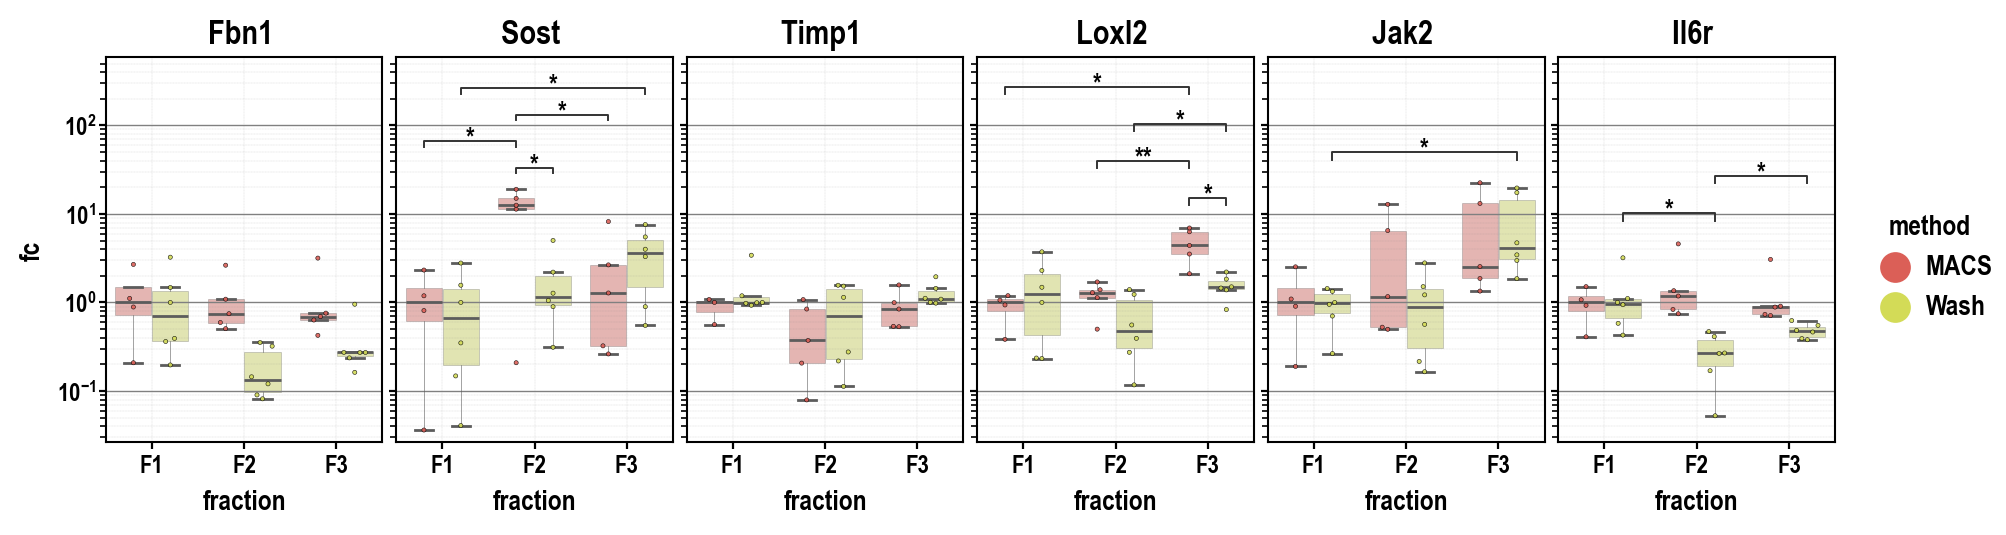

In [232]:
# Colors
# plst.set_palette(["#db5f57", "#91db57", "#57d3db"], verbose=False)

# Plot
(
    DA.plot_box_swarm(
        subplot_kws=dict(figsize=(10, 2.5)),
    )
    .edit_grid()  # Add gridlines
    .edit_y_scale_log(10)  # Log scale
    .annotate_pairwise()  # Add p-value annotations
)
# plt.savefig("qpcr1.png", dpi=300, bbox_inches="tight")
plt.show()